This code tests the accuracy of the Mask R-CNN model for caravans. It looks at the F1 scores, confusion matrices of the data and looks at the visual outputs of the model comparing it to the original image, the result of the model, labels and calculated True Positives.

In [11]:
import rasterio as rst
from matplotlib import pyplot as plt
import numpy as np 
from sklearn.metrics import confusion_matrix, f1_score
import os
import statistics
from rasterio.features import shapes
import geopandas as gdp

%matplotlib inline

In [12]:
#function for f1 scores and confusion matrix, takes 1 dimensional label with 1s and 0s and 3D results with 0-255 values
def stats(label, result):
    result_un = result[..., 0].ravel() / 255
    label_un  = label.ravel()
    f1 = f1_score(label_un, result_un)
    cmatrix = confusion_matrix(label_un, result_un)
    return f1, cmatrix
#function that shows where results and labels overlap, i.e. where TRUE POSITIVES exist
def true_positives(result, label):
    m=(result[:,:,0]*label)/255
    return m

In [14]:
#loop through directories of results and labels
ROOT_DIR = ".../caravanProject/maskrcnn-master/"
#print(ROOT_DIR)
results_dir = os.path.join(ROOT_DIR, "results/masks")
labels_dir = os.path.join(ROOT_DIR, "test_labels")
orig_dir = os.path.join(ROOT_DIR, "caravan/test/images")
#print(results_dir, labels_dir)
origs=[]
labels=[]
results=[]
for i in os.listdir(labels_dir):
    with rst.open(labels_dir+"/"+i) as l:
        label = l.read()
        label = np.moveaxis(label, 0, -1)
        label=label[:,:,0]
        labels.append(label)
for ii in os.listdir(results_dir):
    with rst.open(results_dir+"/"+ii) as r:
        result = r.read()
        result = np.moveaxis(result, 0, -1)
        results.append(result)
        #print(result.shape)
for iii in os.listdir(orig_dir):
#     print(iii)
    with rst.open(orig_dir+"/"+iii) as o:
        orig = o.read()
        orig = np.moveaxis(orig, 0, -1)
        origs.append(orig)       
#print(labels, results)
# print(len(labels),len(results))
l_r_pairs = list(zip(labels, results))
#print(l_r_pairs)

In [15]:
print(len(results), len(labels), len(results))

134 134 134


In [16]:
# list comprehension: results = [value_that_you_wanna_add for some_entry in some_iterable(e.g. zip)]
mystats = [stats(label, result) for (label, result) in l_r_pairs]


In [17]:
#this for loop is the same as above 
f1_scores =[]
c_matrices = []
for label, result in l_r_pairs:
    f1_scores.append(stats(label, result)[0])
    c_matrices.append(stats(label, result)[1])
print(f1_scores)

[0.9348436144701261, 0.658720200752823, 0.8358180058083253, 0.929156980300991, 0.8626873661670237, 0.6703516782824641, 0.8964363971860224, 0.9373718970621726, 0.7939860390191515, 0.7444185727982467, 0.9347548962799861, 0.9219394284089293, 0.9321937321937322, 0.5252273815222595, 0.9022539611693818, 0.7838978688355812, 0.8532156550676409, 0.8525110375275938, 0.8985820976296136, 0.8084426697090702, 0.37313813941612045, 0.9318671352454371, 0.8613167900740445, 0.8722516350046714, 0.8809238152369526, 0.7527060782681099, 0.5030395136778115, 0.7097759674134421, 0.9213836477987422, 0.9090909090909091, 0.7637698898408812, 0.7920267311902293, 0.4900105152471083, 0.9203643843667353, 0.9368288060644345, 0.8521665250637213, 0.8301683016830169, 0.7943262411347517, 0.7401655256973537, 0.7800069581352198, 0.8966798810703668, 0.9117069980379333, 0.9329586863941695, 0.9165528751327567, 0.9166387038013518, 0.9018777239216325, 0.9208299208299208, 0.9200706154501734, 0.9321063394683026, 0.9224308691862768, 

In [18]:
#calculate the true positives
TPs=[true_positives(result, label) for (label,result) in l_r_pairs]
print(TPs)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0.

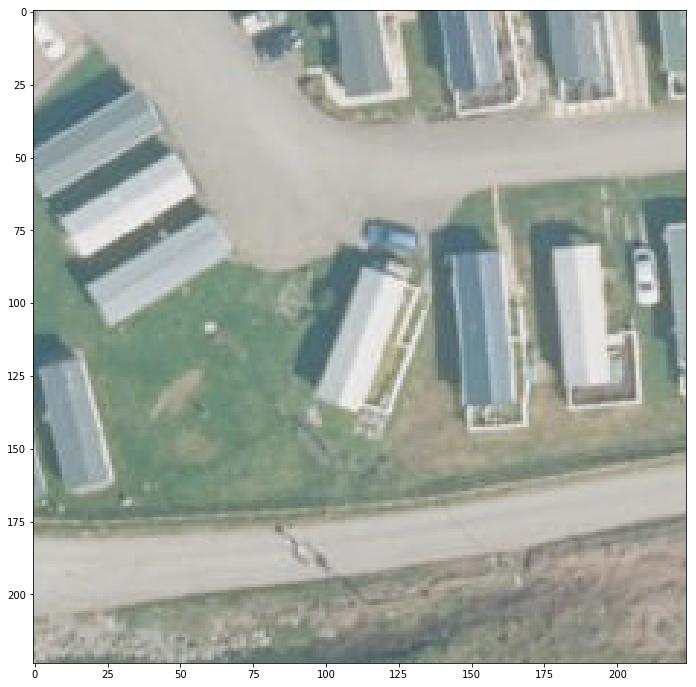

0


In [32]:
#plot an orig image
f = plt.figure(figsize = (12,12))
plt.imshow(orig)
plt.show()

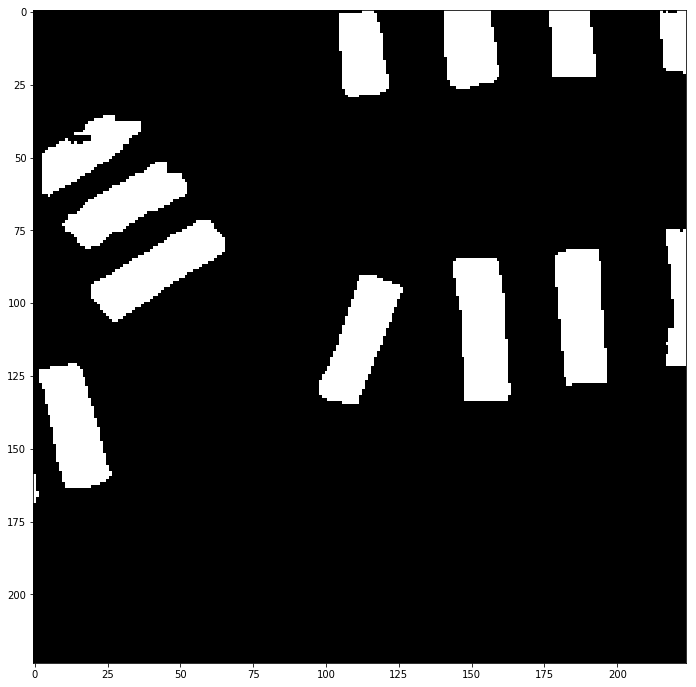

0


In [33]:
#plot the result of model for that image
f = plt.figure(figsize = (12,12))
plt.imshow(result)
plt.show()
#checks all three layers of the result mask are the same
print((result[..., 1] != result[..., 2]).sum())

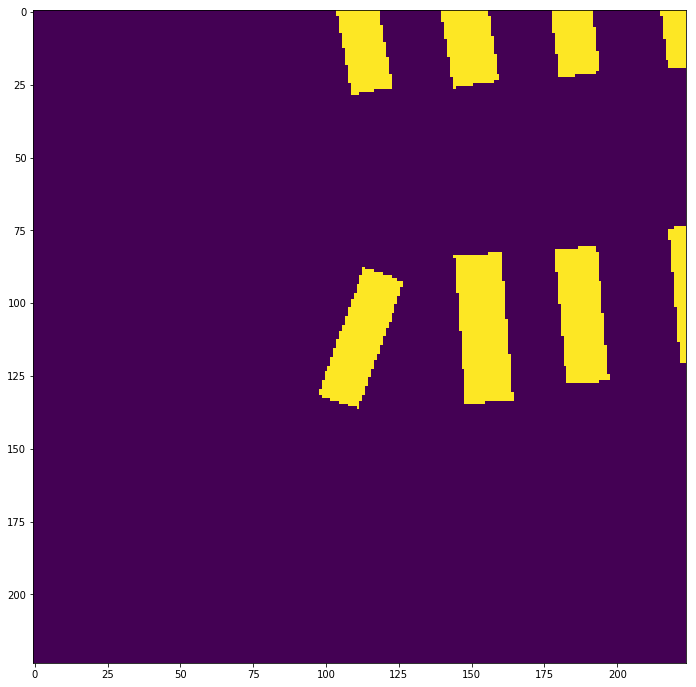

In [20]:
#plot its label mask
f = plt.figure(figsize = (12,12))
plt.imshow(label)
plt.show()

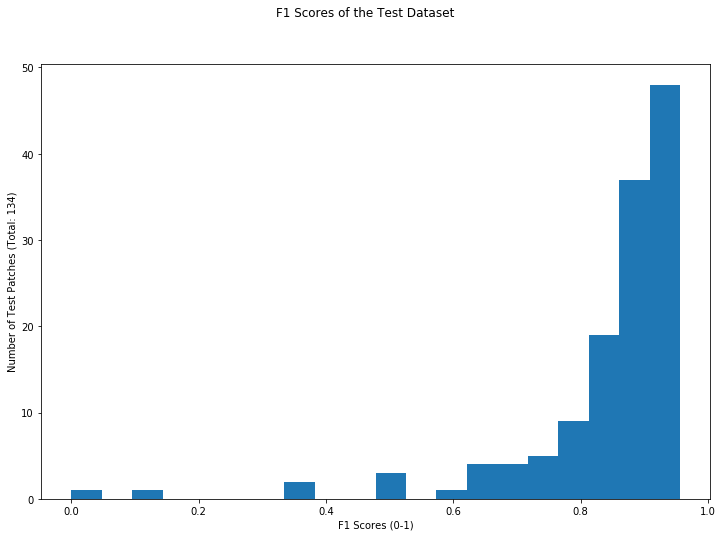

In [21]:
#plot the f1 scores
f = plt.figure(figsize=(12,8))
plt.suptitle('F1 Scores of the Test Dataset')
plt.xlabel('F1 Scores (0-1)')
plt.ylabel('Number of Test Patches (Total: 134)')
plt.hist(f1_scores, bins=20)
plt.show()

In [23]:
#pair the f1 scores to the original images, results, labels and TPs
f1_l_r_pairs = list(zip(f1_scores, origs, results, labels, TPs))
print(len(f1_l_r_pairs[0]))

5


In [24]:
#sort the f1/orig/results/label/TP pairs in order from lowest to highest
sorted_f1s = sorted(f1_l_r_pairs, key = lambda f1_l_r_pairs: f1_l_r_pairs[0])

In [25]:
#sort just the f1 scores and find average
f1s_order =sorted(f1_scores)
f1_avg = statistics.mean(f1_scores)
print(f1_avg)

0.8379334661625915


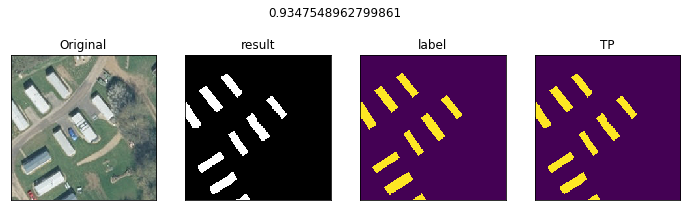

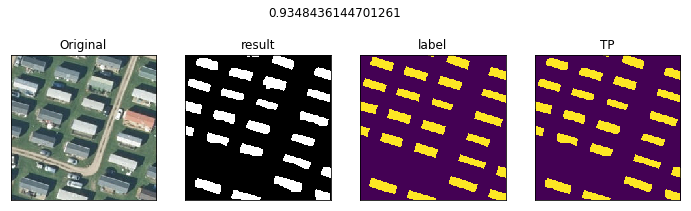

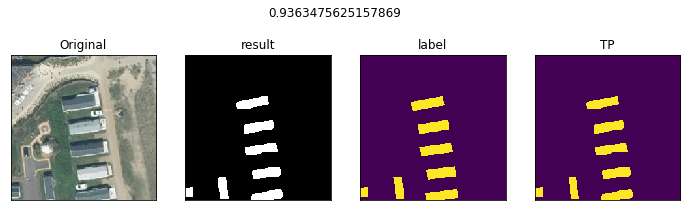

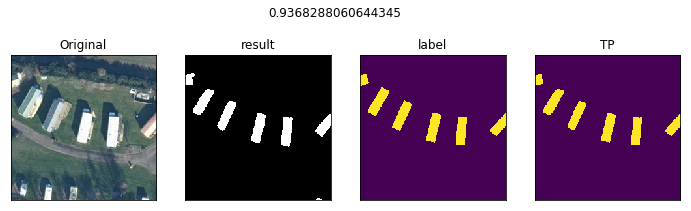

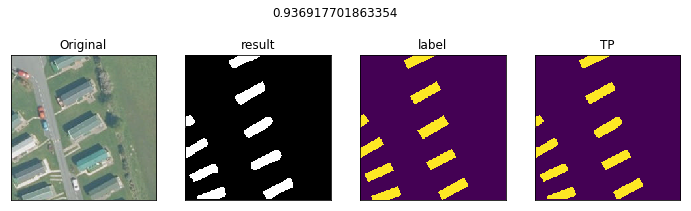

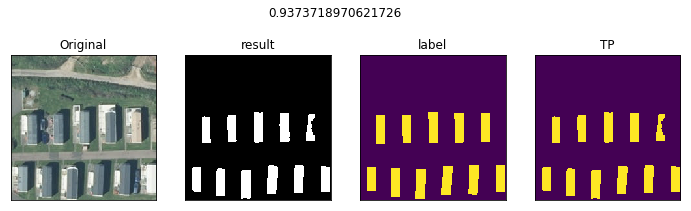

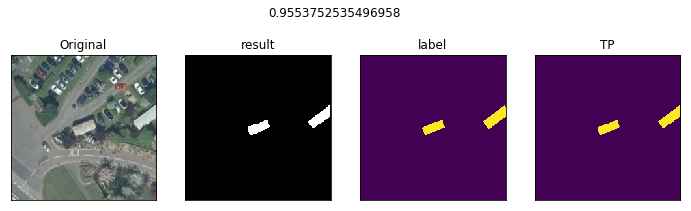

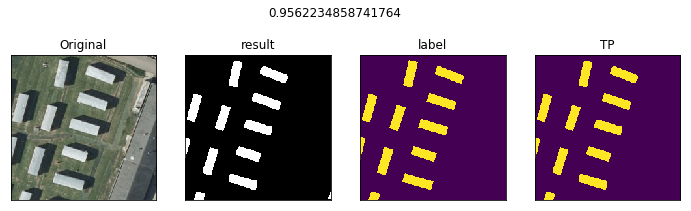

In [176]:
#plot good examples with high f1 scores
def plot(index, arr=sorted_f1s):
    f, axes = plt.subplots(1,4, figsize = (12,3.5))
    f.suptitle(arr[index][0])
    
    titles = ['Original', 'result', 'label', 'TP']

    for idx, ax in enumerate(axes):
        ax.imshow(arr[index][idx+1])
        ax.set_title(titles[idx])
        ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelleft=False,
        labelbottom=False)

for i in range(126, 134): plot(i)

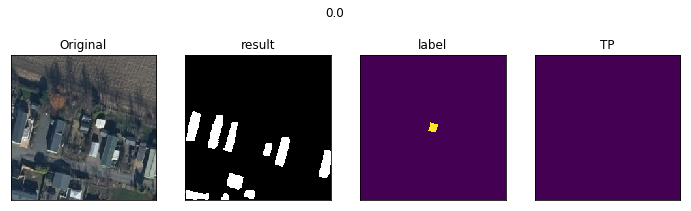

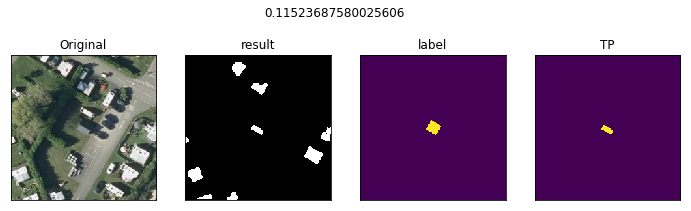

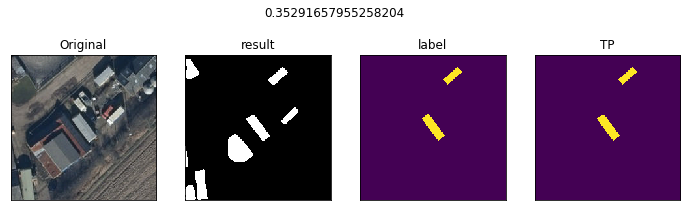

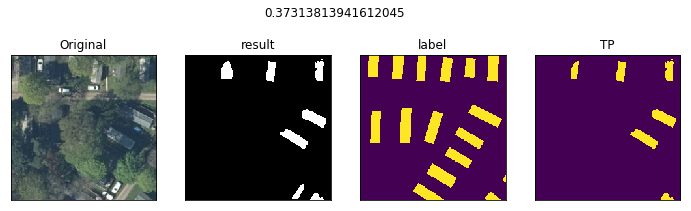

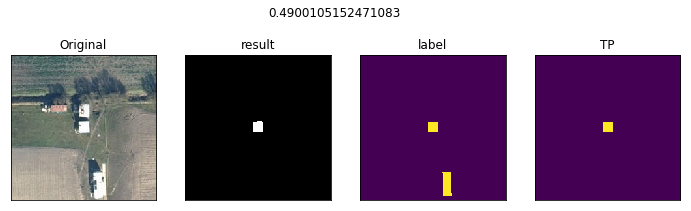

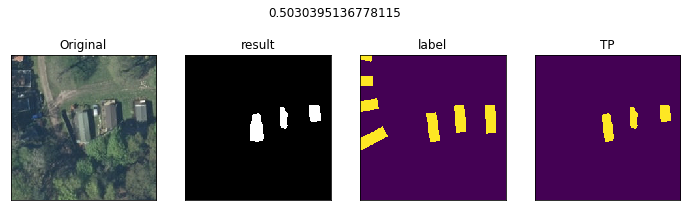

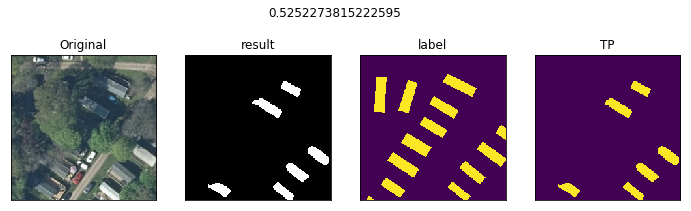

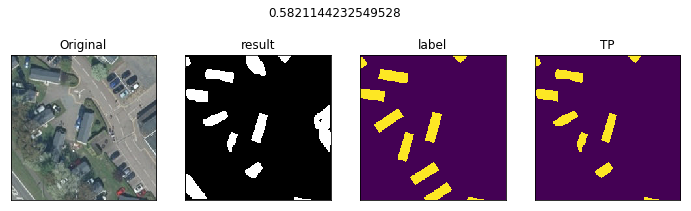

In [26]:
#plot bad examples with low f1 scores
def plot(index, arr=sorted_f1s):
    f, axes = plt.subplots(1,4, figsize = (12,3.5))
    f.suptitle(arr[index][0])
    
    titles = ['Original', 'result', 'label', 'TP']

    for idx, ax in enumerate(axes):
        ax.imshow(arr[index][idx+1])
        ax.set_title(titles[idx])
        ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelleft=False,
        labelbottom=False)

for i in range(0, 8): plot(i)